## Auto-Encoders in Neural Network

#### Autoencoder is an  artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.

#### When ? - If you have additional unlabeled data (beyond the labelled training data). e.g. If you are recognizing employee faces do could use unlabeled face images (of any face).

#### By making use of (plentiful) unlabelled data – to generate a reduced dimension encoding. As the encoding is reduced dimension, the amount of labelled training data to train a classifier is reduced.



## Downloading the MNIST dataset

In [1]:
from keras.datasets import mnist
(x_train,_), (x_test,_) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
from random import randint
from matplotlib import pyplot as plt

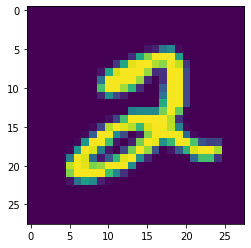

In [4]:
plt.imshow(x_train[randint(0, x_train.shape[1])])

In [5]:
x_train.shape

(60000, 28, 28)

#### Re-sizing the shape of data
#### Each training example is of size 28 x 28 (2-d matrix). But in the machine learning world 
#### we assume training examples as rows and features as columns. Hence, reshaping 28 x 28 image to row of 784 columns.

In [6]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

#### Normalizing the data
#### Dividing with 255 since the pixel ranges between 0-255

In [7]:
x_train = x_train / 255

In [8]:
x_test = x_test / 255

In [53]:
from keras.models import Model

In [54]:
from keras.layers import Dense, Input

#### Here we are following the Functional Mode for building the model

In [11]:
input_layer = Input(shape=(784,))
encoding_layer = Dense(32, activation='relu')(input_layer)
decoding_layer = Dense(784, activation='sigmoid')(encoding_layer)

In [12]:
autoencoder = Model(input_layer, decoding_layer)

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adagrad')

### Encoding layer
#### Forming the encoding layer from total model

In [15]:
encoder = Model(input_layer, encoding_layer)

### Decoding layer
#### Forming the decoding layer from total model

In [16]:
encoded_input = Input(shape=(32,))
decoded_output = autoencoder.layers[-1](encoded_input)
decoder = Model(encoded_input, decoded_output)

In [17]:
decoded_output.shape

TensorShape([None, 784])

In [18]:
autoencoder.fit(x=x_train, y=x_train, batch_size=32, epochs=50, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 48us/step - loss: 0.1692 - val_loss: 0.1421
Epoch 2/50
48000/48000 [==============================] - 2s 47us/step - loss: 0.1339 - val_loss: 0.1273
Epoch 3/50
48000/48000 [==============================] - 2s 46us/step - loss: 0.1230 - val_loss: 0.1196
Epoch 4/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.1168 - val_loss: 0.1147
Epoch 5/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.1126 - val_loss: 0.1113
Epoch 6/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.1097 - val_loss: 0.1089
Epoch 7/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.1074 - val_loss: 0.1069
Epoch 8/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.1057 - val_loss: 0.1054
Epoch 9/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.1042 - val_loss: 0.1042
Epoch

#### Encoding on train data

In [19]:
x_train_encoded = encoder.predict(x_train)

#### Encoding on test data

In [20]:
x_test_encoded = encoder.predict(x_test)

In [21]:
x_train_encoded.shape

(60000, 32)

#### Decoding on test encoded data

In [22]:
x_test_decoded = decoder.predict(x_test_encoded)

In [23]:
x_test_decoded.shape

(10000, 784)

In [24]:
x_test.shape

(10000, 784)

In [25]:
x_test = x_test.reshape(x_test.shape[0], 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

In [27]:
x_test_decoded.shape

(10000, 784)

In [28]:
x_test_decoded = x_test_decoded.reshape(x_test_decoded.shape[0], 28, 28)

In [29]:
x_test_decoded.shape

(10000, 28, 28)

#### Taking the random image from test data

In [30]:
img = randint(0, x_test.shape[0])
img

3393

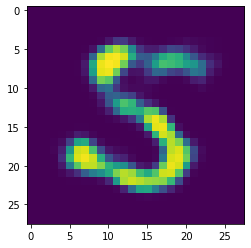

In [31]:
plt.imshow(x_test_decoded[img])

In [32]:
autoencoder.layers[1].trainable

True

# Applications of Auto-encoders

## 1. Anamoly detection

### Above encoding and decoding is on MNIST data


#### if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.

In [33]:
import os

In [37]:
os.getcwd()


'/Users/i313121'

In [38]:
os.chdir('/Users/i313121/Desktop')

In [52]:
%matplotlib inline
from keras.preprocessing import image
import numpy as np

In [40]:
img_anamoly = image.load_img("./venkatasatyanarayana.png", target_size=(28, 28), color_mode = "grayscale")
input_img = image.img_to_array(img_anamoly)
inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

[5318.406]


## Conclusion
### During the training we have seen that validation error for last epoch for MNIST data is 0.0943

### However for above normal picture the error is 5317.6865

# 2. Noise reduction 

### Auto-encoders help in reducing the noise

### Since above model is trained on MNIST data
### Let's introduce some NOISE to it and clear the denoise it

In [68]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

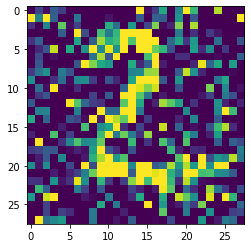

In [69]:
plt.imshow(x_test_noisy[1].reshape(28, 28)) ##Noisy Image

In [71]:
x_test_noisy.shape

(10000, 28, 28, 1)

### Building CNN 

In [72]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import UpSampling2D
from keras.callbacks import TensorBoard

In [87]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
cnnencoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(cnnencoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
cnndecoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

cnnencoder = Model(input_img, cnndecoded)
cnnencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

SyntaxError: invalid syntax (<ipython-input-87-87b999f33f71>, line 18)

In [86]:
cnnencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1714 - val_loss: 0.1250
Epoch 2/5
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1141 - val_loss: 0.1088
Epoch 3/5
60000/60000 [==============================] - 127s 2ms/step - loss: 0.1079 - val_loss: 0.1042
Epoch 4/5
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1049 - val_loss: 0.1017
Epoch 5/5
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1031 - val_loss: 0.1012


In [75]:
cnn_encoder = Model(input_img, cnnencoded)

In [76]:
cnn_encoded_input = Input(shape=(7,7,32))
cnn_decoded_output = cnnencoder.layers[-1](cnn_encoded_input)
cnn_decoder = Model(cnn_encoded_input, cnn_decoded_output)

In [82]:
x_test.shape

(10000, 28, 28, 1)

In [77]:
x_test_encoded = cnn_encoder.predict(x_test)

In [80]:
x_test_encoded.shape

(10000, 7, 7, 32)

In [78]:
x_test_decoded = cnn_decoder.predict(x_test_encoded)

In [81]:
x_test_decoded.shape

(10000, 7, 7, 1)

In [ ]:
img_noisy = x_test_noisy[1]
input_nimg = image.img_to_array(img_noisy)
target_data = cnn_decoder.predict(input_nimg)
dist = np.linalg.norm(input_img - target_data, axis=-1)
print(dist)